

This code is part of the kNDVI/CI assessment. It was used to generate the violin plots of the kNDVI data.  

2024 @author: Pius N.Nwachukwu


In [1]:
import os
import shutil
import ee
import geemap
import pandas as pd
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Authenticate and initialize the Earth Engine module.
ee.Authenticate()
ee.Initialize(project='ee-')

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Calling up the Saved Time Series NDVI Values
csv_file_path = '/content/drive/My Drive/FoRes/ndvi_pixelz_data.csv' # Get the NDVIs in 5000 SR Pixels


# Read the CSV file into a pandas DataFrame
ndvi_df = pd.read_csv(csv_file_path)
print(ndvi_df.head())

        ROI        date  percentage_valid  latitude  longitude  NDVI
0  S_Americ  2000-02-01          29.70645 -6.609515 -58.598977  1355
1  S_Americ  2000-02-01          29.70645 -6.609515 -58.508443  4857
2  S_Americ  2000-02-01          29.70645 -6.654481 -58.694867  3963
3  S_Americ  2000-02-01          29.70645 -6.654481 -58.649596  1773
4  S_Americ  2000-02-01          29.70645 -6.654481 -58.604325  2665


In [4]:
# Set Index
ndvi_df.set_index('date', inplace=True)

In [5]:
# Converting the NDVI to Reflectance
ndvi_df["NDVI_2"] = ndvi_df["NDVI"] / 10000

In [6]:
# # Calculate KNDVI
ndvi_df['KNDVI'] = (ndvi_df['NDVI_2'] + 1) / 2

# print(ndvi_df)

In [7]:
# Check the first few rows after processing
print(ndvi_df.head())

# Summary statistics for KNDVI values
print(ndvi_df['KNDVI'].describe())

# Check if any missing values remain
print(ndvi_df.isnull().sum())


                 ROI  percentage_valid  latitude  longitude  NDVI  NDVI_2  \
date                                                                        
2000-02-01  S_Americ          29.70645 -6.609515 -58.598977  1355  0.1355   
2000-02-01  S_Americ          29.70645 -6.609515 -58.508443  4857  0.4857   
2000-02-01  S_Americ          29.70645 -6.654481 -58.694867  3963  0.3963   
2000-02-01  S_Americ          29.70645 -6.654481 -58.649596  1773  0.1773   
2000-02-01  S_Americ          29.70645 -6.654481 -58.604325  2665  0.2665   

              KNDVI  
date                 
2000-02-01  0.56775  
2000-02-01  0.74285  
2000-02-01  0.69815  
2000-02-01  0.58865  
2000-02-01  0.63325  
count    1.857242e+06
mean     8.627530e-01
std      9.911330e-02
min      4.580000e-01
25%      8.454500e-01
50%      9.052000e-01
75%      9.229000e-01
max      9.873500e-01
Name: KNDVI, dtype: float64
ROI                 0
percentage_valid    0
latitude            0
longitude           0
NDVI          

In [8]:
# ndvi_df['ROI']

# Print all the names of the ROIs
print(ndvi_df['ROI'].unique())

['S_Americ' 'N_Americ' 'Afric' 'Europ' 'Asia' 'Aust_Ocean']


In [9]:
# Filter the DataFrame to get rows where the 'Region' column corresponds to a continent eg 'Africa'
af = ndvi_df[ndvi_df["ROI"] == "Afric"]
asia = ndvi_df[ndvi_df["ROI"] == "Asia"]
eu = ndvi_df[ndvi_df["ROI"] == "Europ"]
na = ndvi_df[ndvi_df["ROI"] == "N_Americ"]
sa = ndvi_df[ndvi_df["ROI"] == "S_Americ"]
oc = ndvi_df[ndvi_df["ROI"] == "Aust_Ocean"]
# print(eu)

In [11]:
# # Define the ROI name you want to filter
# selected_roi = 'Europ'  # Replace 'Europ' with desired ROI

# Filter the DataFrame for pixels within the selected ROI
df_filtered = ndvi_df[ndvi_df['ROI'] == "Europ"]

# Display the first few rows of the filtered DataFrame
print(df_filtered.head())




              ROI  percentage_valid   latitude  longitude  NDVI  NDVI_2  \
date                                                                      
2000-02-01  Europ          0.113841  44.112167  39.360741   603  0.0603   
2000-02-01  Europ          0.113841  44.112167  39.423370  1214  0.1214   
2000-02-01  Europ          0.113841  44.067201  39.393410  1262  0.1262   
2000-02-01  Europ          0.113841  44.067201  39.455991  1628  0.1628   
2000-02-01  Europ          0.113841  44.067201  39.518572  1267  0.1267   

              KNDVI  
date                 
2000-02-01  0.53015  
2000-02-01  0.56070  
2000-02-01  0.56310  
2000-02-01  0.58140  
2000-02-01  0.56335  


In [12]:
# Round the lats and lons
df_filtered_copy = df_filtered.copy()
df_filtered['latitude'] = df_filtered_copy['latitude'].round(2)
df_filtered['longitude'] = df_filtered_copy['longitude'].round(2)
# df_filtered

<ipython-input-12-bf2311a7a670>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['latitude'] = df_filtered_copy['latitude'].round(2)
<ipython-input-12-bf2311a7a670>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['longitude'] = df_filtered_copy['longitude'].round(2)


In [21]:
# import pandas as pd

# # Check the structure of the DataFrame to identify relevant columns
# print(df_filtered.columns)

# # Assuming the columns 'latitude', 'longitude', and 'NDVI' are present
# # Group the data by latitude and longitude to count the unique pixels
# unique_pixels = df_filtered.groupby(['latitude', 'longitude']).size()

# # Print the number of unique pixels
# print(f"Number of unique pixels: {len(unique_pixels)}")

# # If you want to see a sample of the pixel data
# # print(unique_pixels.head())


Index(['ROI', 'percentage_valid', 'latitude', 'longitude', 'NDVI', 'NDVI_2',
       'KNDVI'],
      dtype='object')
Number of unique pixels: 1277


In [13]:
import pandas as pd


# Define the range for valid KNDVI values
valid_ndvi_min = -1
valid_ndvi_max = 1

# Filter the dataset for valid NDVI values
valid_ndvi_data = df_filtered[(df_filtered['NDVI_2'] >= valid_ndvi_min) & (df_filtered['NDVI_2'] <= valid_ndvi_max)]

# Group by latitude and longitude to identify unique pixels with valid data
valid_pixels = valid_ndvi_data.groupby(['latitude', 'longitude']).size()

# Calculate the percentage of valid pixels
percentage_valid_pixels = (len(valid_pixels) / 1277) * 100  # Assuming 5460 is the total number of unique pixels

print(f"Percentage of pixels with valid NDVI data: {percentage_valid_pixels:.2f}%")


Percentage of pixels with valid NDVI data: 100.00%


In [15]:
# import pandas as pd

# # Check the structure of the DataFrame to ensure it's correct
# print(df_filtered.head())

# # Verify the length of the NDVI time series for a few pixels
# print(f"Number of columns (including metadata): {df_filtered.shape[1]}")
# print(f"Expected number of NDVI points per pixel: {df_filtered.shape[1] - 3}")

# # Let's print out the time series length for the first pixel
# first_pixel_series = df_filtered.iloc[0, 3:]
# print(f"Length of the first pixel time series: {len(first_pixel_series)}")


In [14]:
import pandas as pd

# Assuming ndvi_data is already loaded as a DataFrame

# Reset index to ensure 'Date' is only in columns
df_filtered = df_filtered.reset_index()

# Pivot the data to create a time series for each pixel
ndvi_pivot = df_filtered.pivot_table(index=['latitude', 'longitude'], columns='date', values='KNDVI')

# Display the reshaped DataFrame
print(ndvi_pivot.head())

# Now, check the length of the time series for one pixel
print(f"Number of time points: {ndvi_pivot.shape[1]}")


date                2000-02-01  2000-03-01  2000-04-01  2000-05-01  \
latitude longitude                                                   
43.06    41.39             NaN         NaN         NaN         NaN   
         41.45             NaN         NaN         NaN         NaN   
         41.51             NaN         NaN         NaN         NaN   
43.08    41.40          0.5442     0.54725      0.8362     0.88065   
         41.46          0.5380     0.58395      0.7829     0.87675   

date                2000-06-01  2000-07-01  2000-08-01  2000-09-01  \
latitude longitude                                                   
43.06    41.39             NaN         NaN         NaN         NaN   
         41.45             NaN         NaN         NaN         NaN   
         41.51             NaN         NaN         NaN         NaN   
43.08    41.40         0.92875      0.9407      0.9355     0.93260   
         41.46         0.92055      0.9401      0.9370     0.93585   

date              

In [16]:
# Reset index to bring latitude and longitude back into columns
ndvi_melted = ndvi_pivot.reset_index().melt(id_vars=['latitude', 'longitude'],
                                            var_name='date',
                                            value_name='KNDVI')

# Convert 'date' column to datetime
ndvi_melted['date'] = pd.to_datetime(ndvi_melted['date'])

# Display the transformed DataFrame
print(ndvi_melted.head())


   latitude  longitude       date   KNDVI
0     43.06      41.39 2000-02-01     NaN
1     43.06      41.45 2000-02-01     NaN
2     43.06      41.51 2000-02-01     NaN
3     43.08      41.40 2000-02-01  0.5442
4     43.08      41.46 2000-02-01  0.5380


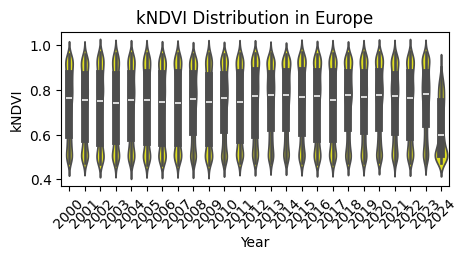

In [17]:
# Import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot size
plt.figure(figsize=(5, 2))

# Create a violin plot of KNDVI values across different time points
sns.violinplot(x=ndvi_melted['date'].dt.year, y=ndvi_melted['KNDVI'], inner='box', color='yellow')
# sns.violinplot(x=ndvi_melted['date'].dt.year, y=ndvi_melted['KNDVI'],
#                inner='quartile', palette='muted')

# Add title and labels
# plt.title(f'KNDVI Distribution Over Time ({selected_roi})')
plt.title('kNDVI Distribution in Europe')
plt.xlabel('Year')
plt.ylabel('kNDVI')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()
